In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'loan_dataset.xlsx'
# Read the Excel file into a DataFrame
data = pd.read_excel(file_path)


In [82]:
# Display the first few rows of the dataset
print(data.head())

   Serial     ID  Pin-code  age  Fam members       Education  T.Experience  \
0       0  10001    110001   23            4  Under Graduate             1   
1       1  10002    110014   43            3  Under Graduate            19   
2       2  10003    110014   37            1  Under Graduate            15   
3       3  10004    110003   33            1        Graduate             9   
4       4  10005    110004   33            4        Graduate             8   

   Income  Mortgage Fixed Deposit Demat Net Banking Loan  
0  392000         0            no   yes          no   no  
1  272000         0            no   yes          no   no  
2   88000         0            no    no          no   no  
3  800000         0            no    no          no   no  
4  360000         0            no    no          no   no  


In [83]:
# Get an overview of the data types and missing values
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Serial         5000 non-null   int64 
 1   ID             5000 non-null   int64 
 2   Pin-code       5000 non-null   int64 
 3   age            5000 non-null   int64 
 4   Fam members    5000 non-null   int64 
 5   Education      5000 non-null   object
 6   T.Experience   5000 non-null   int64 
 7   Income         5000 non-null   int64 
 8   Mortgage       5000 non-null   int64 
 9   Fixed Deposit  5000 non-null   object
 10  Demat          5000 non-null   object
 11  Net Banking    5000 non-null   object
 12  Loan           5000 non-null   object
dtypes: int64(8), object(5)
memory usage: 507.9+ KB
None


In [84]:
#droping the columns as it seems not that important for our analysis
data=data.drop("Pin-code",axis=1)
data=data.drop("Fam members",axis=1)
data=data.drop("Serial",axis=1)

In [85]:
# Summary statistics
print(data.describe())

                 ID          age  T.Experience        Income      Mortgage
count  5.000000e+03  5000.000000   5000.000000  5.000000e+03  5.000000e+03
mean   8.186318e+06    43.338400     20.104600  5.901936e+05  4.519904e+05
std    3.638026e+06    11.463166     11.467954  3.682698e+05  8.137104e+05
min    1.000100e+04    21.000000     -3.000000  6.400000e+04  0.000000e+00
25%    1.000125e+07    33.000000     10.000000  3.120000e+05  0.000000e+00
50%    1.000250e+07    43.000000     20.000000  5.120000e+05  0.000000e+00
75%    1.000375e+07    53.000000     30.000000  7.840000e+05  8.080000e+05
max    1.000500e+07    65.000000     43.000000  1.792000e+06  5.080000e+06


In [86]:
#Shows the no. of null values in dataset according to columns.
data.isnull().sum()

ID               0
age              0
Education        0
T.Experience     0
Income           0
Mortgage         0
Fixed Deposit    0
Demat            0
Net Banking      0
Loan             0
dtype: int64

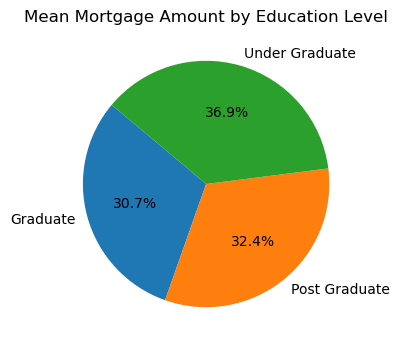

In [87]:
# Creating a pie chart to visualize the mean mortgage amount for each education level
plt.figure(figsize=(4, 4))
plt.pie(grp, labels=grp.index, autopct='%1.1f%%', startangle=140)
plt.title('Mean Mortgage Amount by Education Level')
plt.show()

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


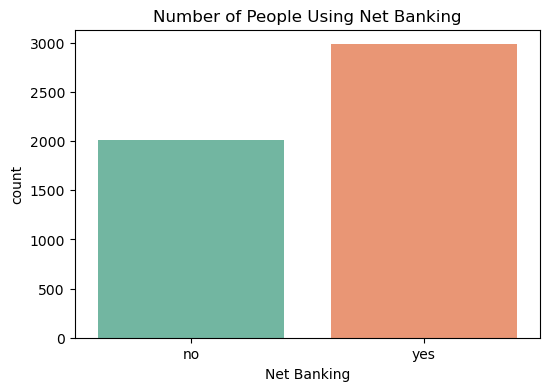

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


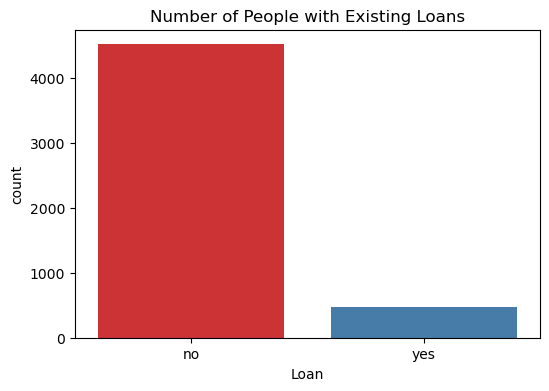

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creating a count plot for 'Net Banking'
plt.figure(figsize=(6, 4))
sns.countplot(x='Net Banking', data=data, palette='Set2')
plt.title('Number of People Using Net Banking')
plt.show()

# Creating a count plot for 'Loan'
plt.figure(figsize=(6, 4))
sns.countplot(x='Loan', data=data, palette='Set1')
plt.title('Number of People with Existing Loans')
plt.show()


In [89]:
 #Define the age ranges
age_bins = [20, 30, 40, 50, 60, 100]  # Define the age bins
age_labels = ['20-29', '30-39', '40-49', '50-59', '60+']  # Define the labels for the age ranges

# Creating a new column 'Age Range' based on the age bins
data['Age Range'] = pd.cut(data['age'], bins=age_bins, labels=age_labels, right=False)

# Calculating the mean income for each age range
income_by_age_range = data.groupby('Age Range')['Income'].mean().reset_index()

# Print the mean income for each age range
print(income_by_age_range)

  Age Range         Income
0     20-29  619684.913218
1     30-39  599140.336808
2     40-49  602907.363420
3     50-59  552462.006079
4       60+  591021.176471


C:\Users\DELL\AppData\Local\Temp\ipykernel_23872\1293015034.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_by_age_range = data.groupby('Age Range')['Income'].mean().reset_index()


C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


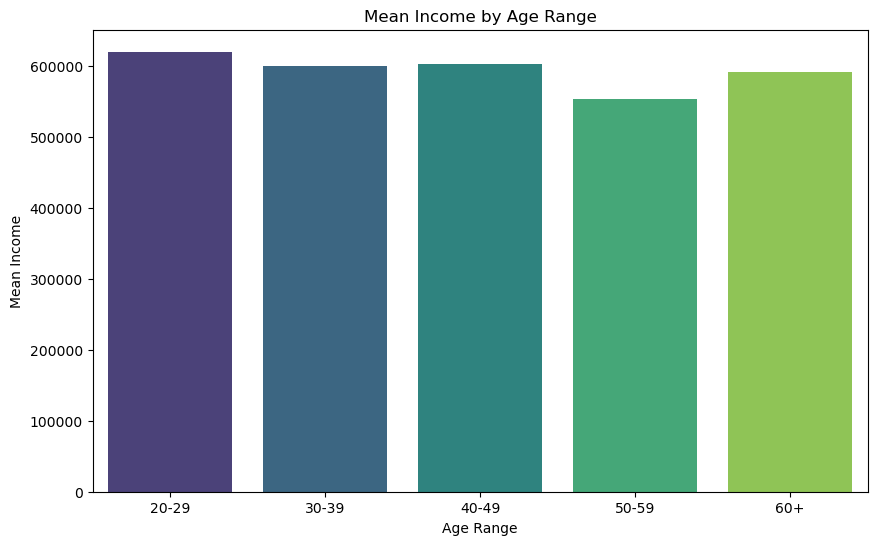

In [90]:
# Creating a bar plot to visualize the mean income for each age range
plt.figure(figsize=(10, 6))
sns.barplot(x='Age Range', y='Income', data=income_by_age_range, palette='viridis')
plt.title('Mean Income by Age Range')
plt.xlabel('Age Range')
plt.ylabel('Mean Income')
plt.show()

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldc

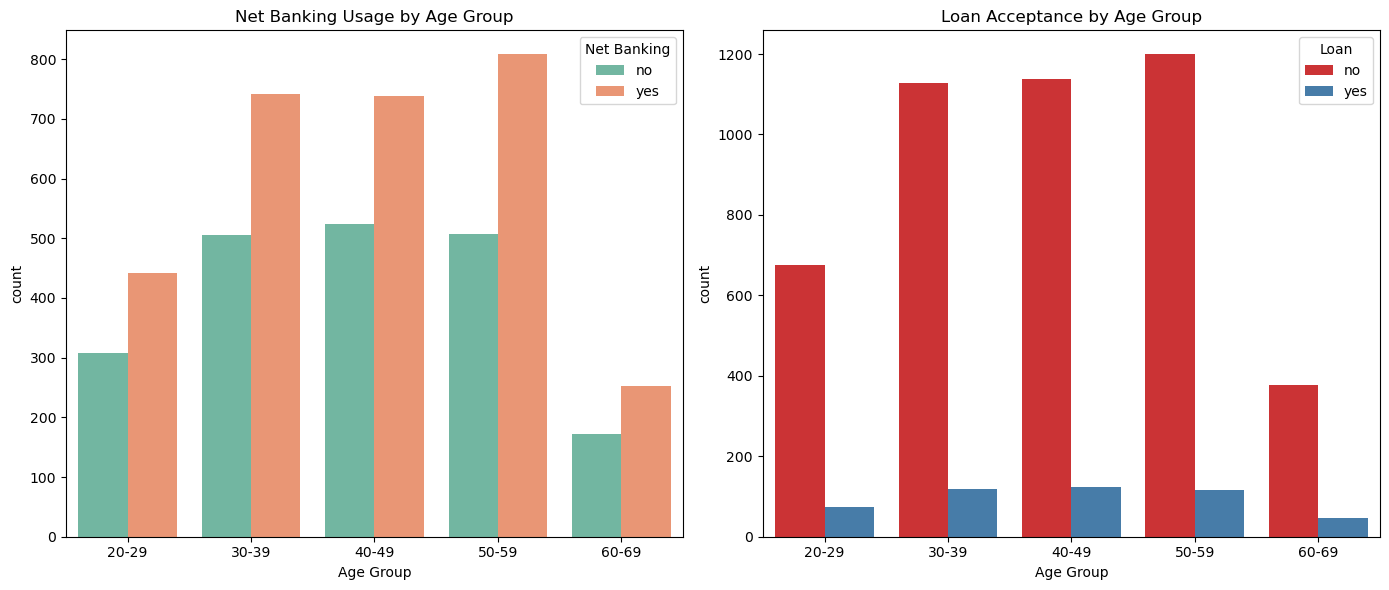

In [91]:
# Defining the age bins
age_bins = [20, 30, 40, 50, 60, 70]  # Define the age bins
age_labels = ['20-29', '30-39', '40-49', '50-59', '60-69']  # Define the labels for the age ranges

# Creating a new column 'Age Group' based on the age bins
data['Age Group'] = pd.cut(data['age'], bins=age_bins, labels=age_labels, right=False)

# Creating separate count plots for net banking and loans based on age groups
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='Age Group', hue='Net Banking', data=data, palette='Set2')
plt.title('Net Banking Usage by Age Group')

plt.subplot(1, 2, 2)
sns.countplot(x='Age Group', hue='Loan', data=data, palette='Set1')
plt.title('Loan Acceptance by Age Group')

plt.tight_layout()
plt.show()

In [92]:
# Defining the income bins
income_bins = [0, 30000, 50000, 70000, 100000, float('inf')]  # Define your own income bins as per your dataset

# Creating a new column 'income_bin' based on the income bins
data['income_bins'] = pd.cut(data['Income'], bins=income_bins)

# Calculating the number of people having a loan or not within each income bin
loan_status_by_income = data.groupby(['income_bins', 'Loan']).size().unstack(fill_value=0)

print(loan_status_by_income)

Loan                   no  yes
income_bins                   
(0.0, 30000.0]          0    0
(30000.0, 50000.0]      0    0
(50000.0, 70000.0]     23    0
(70000.0, 100000.0]   106    0
(100000.0, inf]      4391  480


C:\Users\DELL\AppData\Local\Temp\ipykernel_23872\3584936838.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  loan_status_by_income = data.groupby(['income_bins', 'Loan']).size().unstack(fill_value=0)


C:\Users\DELL\AppData\Local\Temp\ipykernel_23872\2522297398.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  loan_status_by_income = data.groupby(['income_bins', 'Loan']).size().unstack(fill_value=0)
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Us

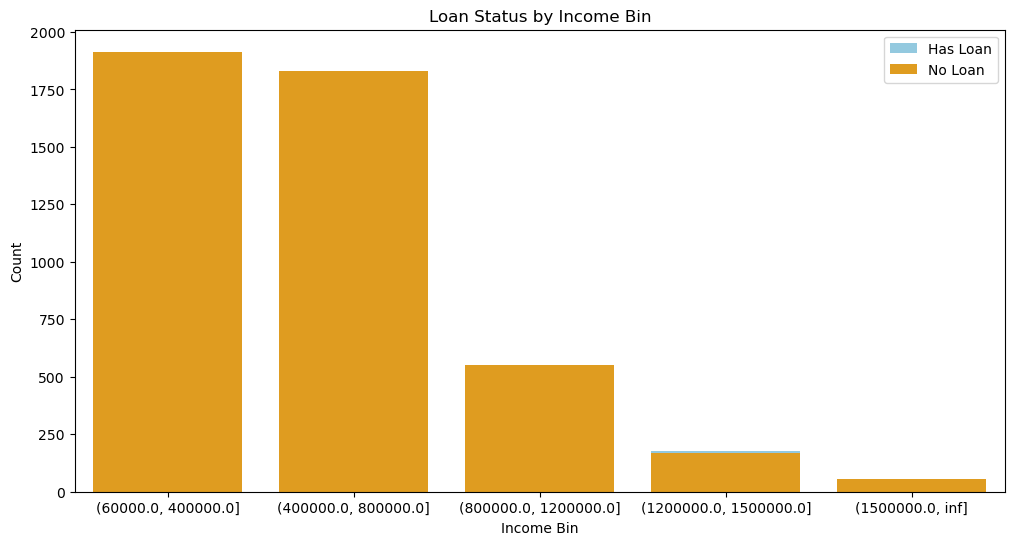

In [94]:
# Defining the income bins
income_bins = [60000, 400000, 800000, 1200000, 1500000 ,float('inf')]  # Define your own income bins as per your dataset

# Creating a new column 'income_bin' based on the income bins
data['income_bins'] = pd.cut(data['Income'], bins=income_bins)

# Calculating the number of people having a loan or not within each income bin
loan_status_by_income = data.groupby(['income_bins', 'Loan']).size().unstack(fill_value=0)

# Reseting the index for better visualization
loan_status_by_income = loan_status_by_income.reset_index()

# Plotting the data using seaborn and matplotlib
plt.figure(figsize=(12, 6))
sns.barplot(x='income_bins', y='yes', data=loan_status_by_income, color='skyblue', label='Has Loan')
sns.barplot(x='income_bins', y='no', data=loan_status_by_income, color='orange', label='No Loan')
plt.xlabel('Income Bin')
plt.ylabel('Count')
plt.title('Loan Status by Income Bin')
plt.legend()
plt.show()

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


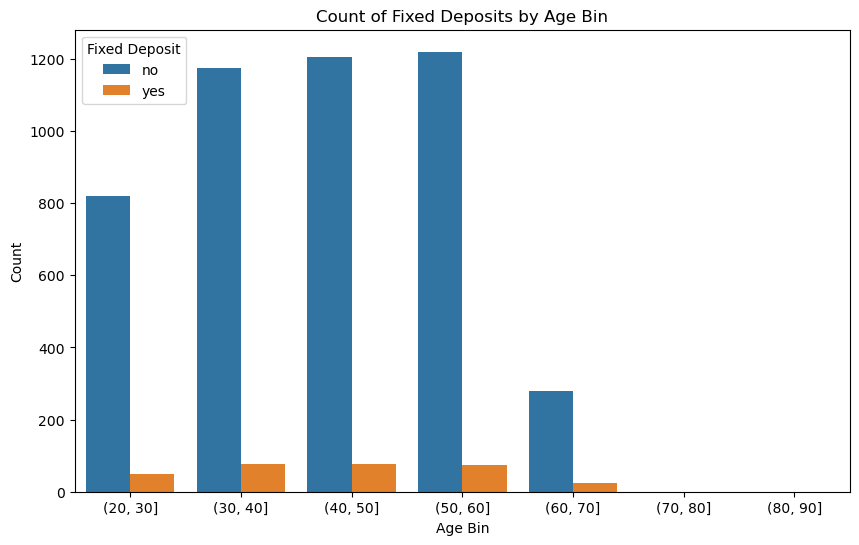

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


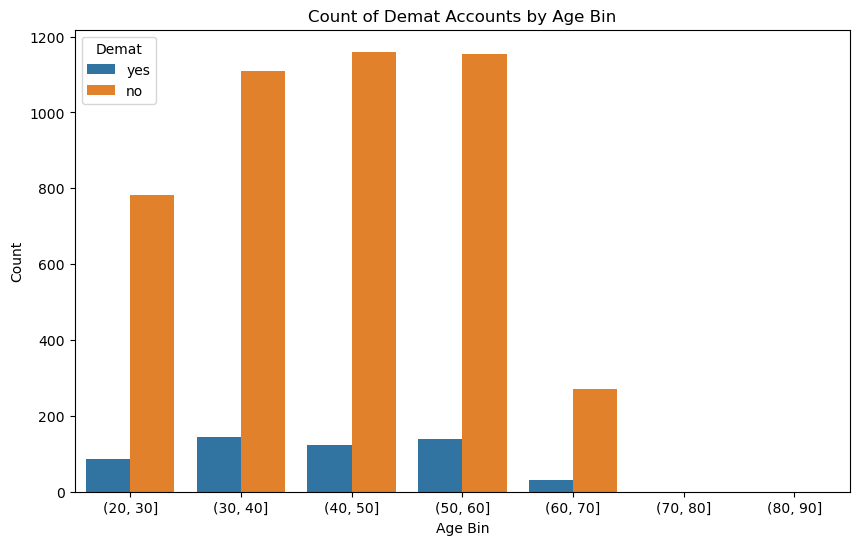

In [95]:
# Defining the age bins
age_bins = [20, 30, 40, 50, 60, 70, 80, 90]

# Creating a new column 'age' based on the age bins
data['age_bins'] = pd.cut(data['age'], bins=age_bins)

# Selecting only the columns 'age', 'fixed_deposit', and 'demat'
selected_data = data[['age_bins', 'Fixed Deposit', 'Demat']]

# Filtering the data to include only 'yes' or 'no' values for 'fixed_deposit' and 'demat'
filtered_data = selected_data[(selected_data['Fixed Deposit'].isin(['yes', 'no'])) & (selected_data['Demat'].isin(['yes', 'no']))]

# Plotting the data using seaborn and matplotlib
plt.figure(figsize=(10, 6))
sns.countplot(data=filtered_data, x='age_bins', hue='Fixed Deposit')
plt.title('Count of Fixed Deposits by Age Bin')
plt.xlabel('Age Bin')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=filtered_data, x='age_bins', hue='Demat')
plt.title('Count of Demat Accounts by Age Bin')
plt.xlabel('Age Bin')
plt.ylabel('Count')
plt.show()

In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'loan_dataset26.xlsx'
# Read the Excel file into a DataFrame
data1 = pd.read_excel(file_path)


In [115]:
#droping the columns as it seems not that important for our analysis
data1=data1.drop("Pin-code",axis=1)
data1=data1.drop("Fam members",axis=1)
data1=data1.drop("Serial",axis=1)
data1=data1.drop("Education",axis=1)
data1=data1.drop("Fixed Deposit",axis=1)
data1=data1.drop("Demat",axis=1)
data1=data1.drop("Net Banking",axis=1)
data1=data1.drop("ID",axis=1)

In [116]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Spliting the dataset into features (X) and target variable (y)
X = data1.drop('Loan', axis=1)
y = data1['Loan']

# Spliting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Development
# Choosing a classifier and train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Model Evaluation
# Evaluating the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.911


In [117]:
# Spliting the data into features and target variable
X = data1.drop('Loan', axis=1)  # Features
y = data1['Loan']  # Target variable

from sklearn.model_selection import train_test_split

# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestClassifier  # Example model

# Creating and training the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.906

Classification Report:
              precision    recall  f1-score   support

          no       0.93      0.97      0.95       895
         yes       0.58      0.36      0.45       105

    accuracy                           0.91      1000
   macro avg       0.76      0.67      0.70      1000
weighted avg       0.89      0.91      0.90      1000


Confusion Matrix:
[[868  27]
 [ 67  38]]


In [119]:
from sklearn.ensemble import RandomForestClassifier

# Example: Train a random forest classifier to assess feature importance
model = RandomForestClassifier()
model.fit(data1.drop('Loan', axis=1), data1['Loan'])

# Assess feature importance
feature_importance = model.feature_importances_
print(feature_importance)

from sklearn.feature_selection import mutual_info_classif

# Example: Calculating mutual information between each feature and the target variable 'Loan'
feature_importance = mutual_info_classif(data1.drop('Loan', axis=1), data1['Loan'])
print(feature_importance)


[0.16377644 0.15798782 0.55813574 0.1201    ]
[0.00238639 0.         0.12183974 0.01536807]


In [121]:
data1=data1.drop("Loan",axis=1)

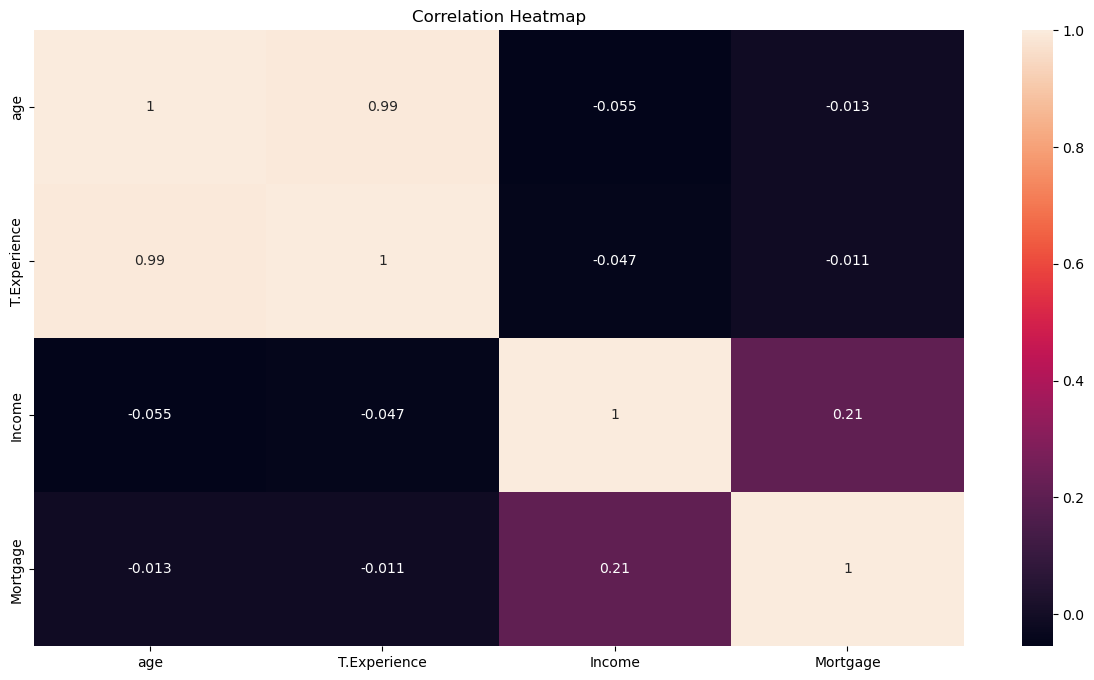

In [122]:
plt.figure(figsize=(15,8))
sns.heatmap(data1.corr(),annot=True).set_title('Correlation Heatmap') #square=True
plt.show()